# kaggle 実践問題例：
## このノートでは,以下のような目的で、進めていくことにある。
  - kaggle の例題を通じて、統計、機械学習を理解していくこと
  - kaggle で優秀なデータサイエンティストの分析方法の技術を盗むこと
  - kaggle を通じて、python を使った機械学習に慣れていくこと<br>である。このことをテーマに進めていく。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os,sys
import seaborn as sns

%matplotlib inline

In [2]:
Data=pd.read_csv('nikkei 225.csv')
print(Data)

             Date       Open       High        Low     Close
0       1949/5/16          -          -          -    176.21
1       1949/5/17          -          -          -    174.80
2       1949/5/18          -          -          -    172.53
3       1949/5/19          -          -          -    171.34
4       1949/5/20          -          -          -    169.20
5       1949/5/21          -          -          -    169.92
6       1949/5/23          -          -          -    171.85
7       1949/5/24          -          -          -    172.75
8       1949/5/25          -          -          -    171.53
9       1949/5/26          -          -          -    170.43
10      1949/5/27          -          -          -    172.76
11      1949/5/28          -          -          -    176.30
12      1949/5/30          -          -          -    176.21
13      1949/5/31          -          -          -    176.52
14       1949/6/1          -          -          -    175.97
15       1949/6/2       

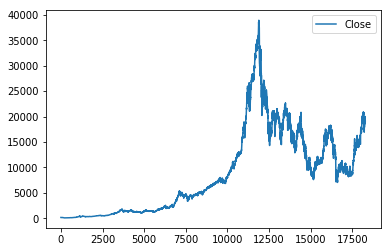

In [4]:
Data.plot()

In [13]:
print(Data.Close[100])

168.86


In [24]:
print(Data.Open[Data.Open!='-'])

10585    12526.09 
10586    12473.34 
10587    12484.46 
10588    12595.35 
10589    12613.27 
10590    12568.65 
10591    12609.94 
10592    12678.49 
10593    12624.05 
10594    12682.21 
10595    12637.11 
10596    12520.98 
10597    12589.15 
10598    12642.35 
10599    12642.73 
10600    12620.61 
10601    12580.09 
10602    12597.16 
10603    12522.98 
10604    12163.90 
10605    12293.38 
10606    12040.90 
10607    12164.28 
10608    12267.73 
10609    12167.33 
10610    12159.90 
10611    12249.00 
10612    12378.37 
10613    12435.08 
10614    12438.90 
           ...    
18246    19641.67 
18247    19771.86 
18248    19851.24 
18249    19800.20 
18250    19875.99 
18251    19856.84 
18252    19929.97 
18253    19994.05 
18254    19857.38 
18255    19799.08 
18256    19957.50 
18257    19894.63 
18258    19616.52 
18259    19710.39 
18260    19689.87 
18261    19391.50 
18262    19070.02 
18263    19020.75 
18264    18887.09 
18265    18869.04 
18266    18868.20 
18267    193

In [25]:
Data[10584:]

,Date,Open,High,Low,Close
10584,1985/3/23,-,-,-,12537.95
10585,1985/3/25,12526.09,12535.10,12479.03,12493.26
10586,1985/3/26,12473.34,12486.15,12448.10,12486.15
10587,1985/3/27,12484.46,12551.77,12483.50,12550.82
10588,1985/3/28,12595.35,12611.17,12575.90,12604.02
10589,1985/3/29,12613.27,12622.62,12567.32,12580.76
10590,1985/3/30,12568.65,12591.82,12551.87,12590.20
10591,1985/4/1,12609.94,12677.15,12600.97,12677.15
10592,1985/4/2,12678.49,12680.87,12608.41,12629.86
10593,1985/4/3,12624.05,12683.26,12621.38,12683.26


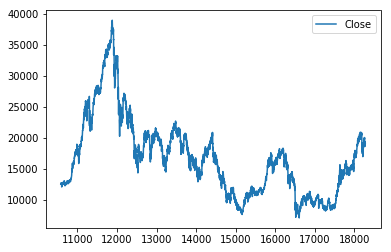

In [26]:
data=Data[10585:]
data.plot()

In [27]:
print(data)

             Date       Open       High        Low     Close
10585   1985/3/25  12526.09   12535.10   12479.03   12493.26
10586   1985/3/26  12473.34   12486.15   12448.10   12486.15
10587   1985/3/27  12484.46   12551.77   12483.50   12550.82
10588   1985/3/28  12595.35   12611.17   12575.90   12604.02
10589   1985/3/29  12613.27   12622.62   12567.32   12580.76
10590   1985/3/30  12568.65   12591.82   12551.87   12590.20
10591    1985/4/1  12609.94   12677.15   12600.97   12677.15
10592    1985/4/2  12678.49   12680.87   12608.41   12629.86
10593    1985/4/3  12624.05   12683.26   12621.38   12683.26
10594    1985/4/4  12682.21   12689.74   12614.99   12627.10
10595    1985/4/5  12637.11   12643.78   12523.55   12544.24
10596    1985/4/6  12520.98   12571.13   12520.40   12569.98
10597    1985/4/8  12589.15   12635.96   12572.27   12635.96
10598    1985/4/9  12642.35   12646.64   12607.65   12630.43
10599   1985/4/10  12642.73   12650.65   12581.71   12601.93
10600   1985/4/11  12620

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0856CC90>],
      dtype=object)

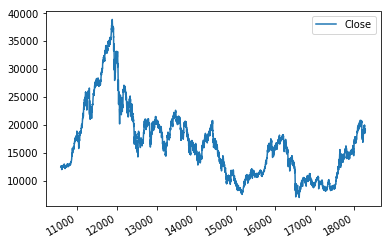

In [29]:
data.plot(subplots=True)

In [31]:
data2=data.Open
data2.plot()

TypeError: Empty 'DataFrame': no numeric data to plot